<a href="https://colab.research.google.com/github/ehpub/ML-with-Python/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_with_python_012_KNN_(K_Nearest_Neighbor)_K_%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%9D%B4%EC%9B%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[설명](https://ehpub.co.kr/knn-k-nearest-neighbor-k-%ec%b5%9c%ea%b7%bc%ec%a0%91-%ec%9d%b4-%eb%a8%b8%ec%8b%a0%eb%9f%ac%eb%8b%9d-with-python/)

In [2]:
from sklearn.neighbors import KNeighborsRegressor #K 최근접 이웃 회귀
from sklearn.neighbors import KNeighborsClassifier #K 최근접 이웃 분류
from sklearn.base import BaseEstimator #기반 모델

from sklearn.model_selection import train_test_split #학습 및 테스트 데이터 분리
from sklearn.preprocessing import MinMaxScaler #MIN-MAX 스케일 변환

from sklearn.metrics import r2_score #r2
from sklearn.metrics import accuracy_score #accuracy

from sklearn.datasets import load_iris #붓꽃 데이터
from sklearn.datasets import load_breast_cancer #유방암 데이터

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
class KNNReg(BaseEstimator):
  def __init__(self,k=5):
    super().__init__()
    self.k = k
  @classmethod
  def distance(cls,x1,x2):
    return np.sqrt(sum((x1-x2)**2))
  def fit(self,train_x,train_y):
    self.train_x = train_x.copy()
    self.train_y = train_y.copy()
  def find_kneighbor(self,tx):
    dis_arr = []
    for i,x in enumerate(self.train_x):
      dis_arr.append((KNNReg.distance(x,tx),i))
    dis_arr.sort(key = lambda x:x[0])
    kindex = min(self.k,len(dis_arr))
    kneighbor = [x[1] for x in dis_arr[:kindex]]
    return sum(self.train_y[kneighbor])
  def predict(self,test_x):
    result = []
    for tx in test_x:
      result.append(self.find_kneighbor(tx)/self.k)#이웃의 평균
    return result

In [4]:
iris = load_iris()
data = iris['data'][:50,[0]] #독립 변수 - sepal length
target = iris['data'][:50,[1]] #종속 변수 - sepal width

x_train,x_test,y_train,y_test = train_test_split(data,target)

In [5]:
model1 = KNNReg()
model2 = KNeighborsRegressor()
for model in [model1,model2]:
  print(model.__class__.__name__,"###")
  model.fit(x_train,y_train)
  pred = model.predict(x_test)
  print("r2:",r2_score(y_test,pred))

KNNReg ###
r2: 0.09918918918918906
KNeighborsRegressor ###
r2: 0.09918918918918918


In [46]:
class KNNCls(BaseEstimator):
  def __init__(self,k=5):
    super().__init__()
    self.k = k
  @classmethod
  def distance(cls,x1,x2):
    return np.sqrt(sum((x1-x2)**2))
  def fit(self,train_x,train_y):
    self.train_x = train_x.copy()
    self.train_y = train_y.copy()
    self.class_cnt = len(np.unique(train_y))
  def find_kneighbor(self,tx):
    dis_arr = []
    for i,x in enumerate(self.train_x):
      dis_arr.append((KNNReg.distance(x,tx),i))
    dis_arr.sort(key = lambda x:x[0])
    kindex = min(self.k,len(dis_arr))
    kneighbor = [x[1] for x in dis_arr[:kindex]]
    return (self.train_y[kneighbor])
  def predict(self,test_x):
    tl = len(test_x)
    result = []
    for tx in test_x:
      re = self.find_kneighbor(tx)
      re,cnt = np.unique(re,return_counts=True)
      idx = np.argsort(cnt)
      result.append(re[idx[-1]])
    return np.array(result)
  def predict_proba(self,test_x):
    result = []
    for tx in test_x:
      re = self.find_kneighbor(tx)
      re,cnt = np.unique(re,return_counts=True)
      trr =np.zeros(self.class_cnt)
      for i,r1 in enumerate(cnt):
        trr[re[i]] = (cnt[i]/self.k)
        print(cnt[i],self.k)
      result.append(trr)
    return np.array(result)

In [34]:
data = iris['data']
target = iris['target']
x_train,x_test,y_train,y_test = train_test_split(data,target)

KNNCls ###
accuracy: 1.0


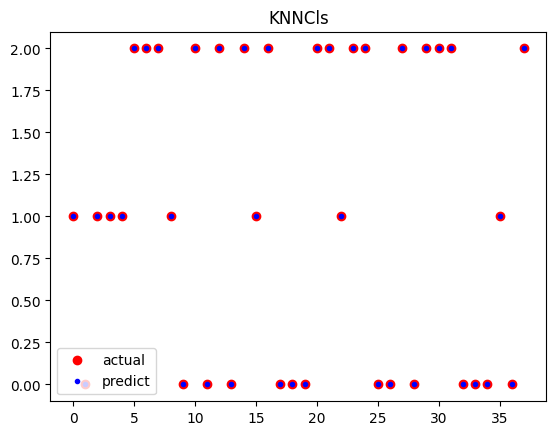

KNeighborsClassifier ###
accuracy: 1.0


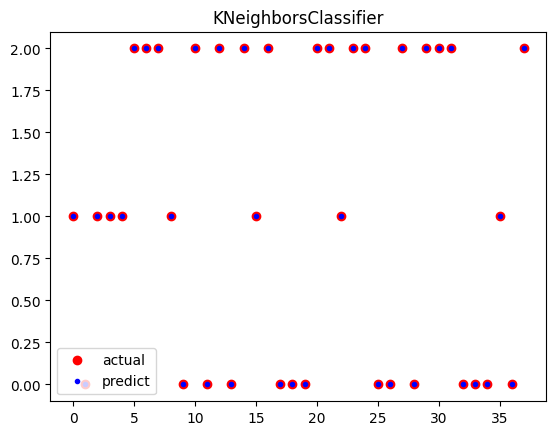

In [39]:
model1 = KNNCls()
model2 = KNeighborsClassifier()
for model in [model1,model2]:
  print(model.__class__.__name__,"###")
  model.fit(x_train,y_train)
  pred = model.predict(x_test)
  print("accuracy:",accuracy_score(y_test,pred))
  plt.plot(y_test,'ro',label='actual')
  plt.plot(pred,'b.',label='predict')
  plt.legend()
  plt.title(model.__class__.__name__)
  plt.show()

In [47]:
model = KNNCls()
model.fit(x_train,y_train)
pred_proba = model.predict_proba(x_test)

5 5
5 5
5 5
5 5
5 5
1 5
4 5
5 5
2 5
3 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
2 5
3 5
5 5
5 5
5 5
2 5
3 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
1 5
4 5
5 5
5 5
5 5
4 5
1 5
5 5
1 5
4 5


In [49]:
print(pred_proba[:10])

[[0.  1.  0. ]
 [1.  0.  0. ]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [0.  0.2 0.8]
 [0.  0.  1. ]
 [0.  0.4 0.6]
 [0.  1.  0. ]
 [1.  0.  0. ]]


In [11]:
bc = load_breast_cancer()
data = bc['data']
target = bc['target']
x_train,x_test,y_train,y_test = train_test_split(data,target)

In [12]:
mms = MinMaxScaler()
scaled_data = mms.fit_transform(data)
xs_train,xs_test,ys_train,ys_test = train_test_split(scaled_data,target)

In [13]:
df1 = pd.DataFrame(data)
print(df1.describe().loc[['min','mean','max']].iloc[:,:5])

              0          1           2            3        4
min    6.981000   9.710000   43.790000   143.500000  0.05263
mean  14.127292  19.289649   91.969033   654.889104  0.09636
max   28.110000  39.280000  188.500000  2501.000000  0.16340


In [14]:
df2 = pd.DataFrame(scaled_data)
print(df2.describe().loc[['min','mean','max']].iloc[:,:5])

             0         1         2        3         4
min   0.000000  0.000000  0.000000  0.00000  0.000000
mean  0.338222  0.323965  0.332935  0.21692  0.394785
max   1.000000  1.000000  1.000000  1.00000  1.000000


In [15]:
model1 = KNNCls()
model2 = KNeighborsClassifier()
for model in [model1,model2]:
  print(model.__class__.__name__,"###")
  model.fit(x_train,y_train)
  pred = model.predict(x_test)
  print("accuracy:",accuracy_score(y_test,pred))

KNNCls ###
accuracy: 0.9370629370629371
KNeighborsClassifier ###
accuracy: 0.951048951048951


In [16]:
model1 = KNNCls()
model2 = KNeighborsClassifier()
for model in [model1,model2]:
  print(model.__class__.__name__,"###")
  model.fit(xs_train,ys_train)
  pred = model.predict(xs_test)
  print("accuracy:",accuracy_score(ys_test,pred))

KNNCls ###
accuracy: 0.9440559440559441
KNeighborsClassifier ###
accuracy: 0.972027972027972
